In [82]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

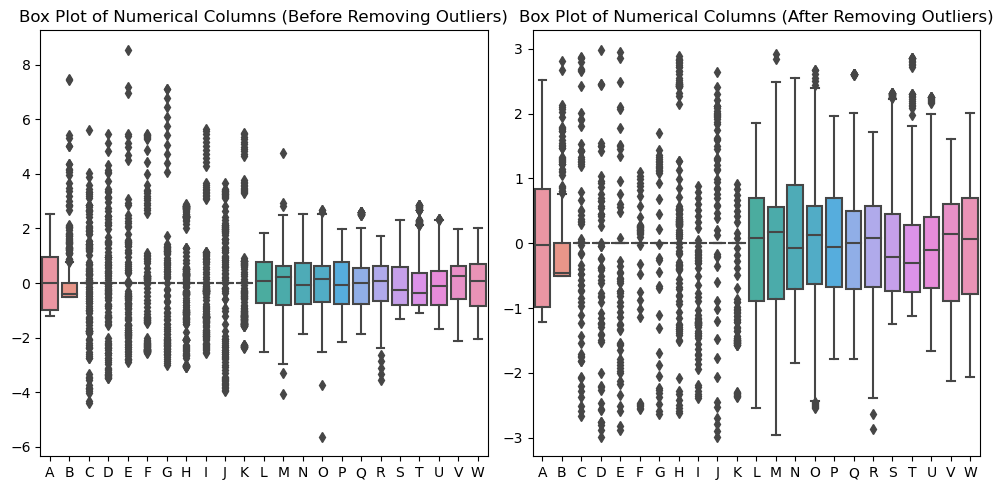

,country,year,code,X,A,B,C,D,E,F,...,N,O,P,Q,R,S,T,U,V,W
0,Algeria,2007,DZA,POINT (28.033886 1.659626),-1.21154,-0.50633,-0.00000,-0.00000,0.00000,-0.0,...,1.23293,-0.56117,1.49369,1.86086,1.15703,1.77216,2.08174,1.99621,1.60765,-0.78253
1,Angola,2007,AGO,POINT (-11.202692 17.873887),0.61593,0.22046,-2.58921,-0.04704,-2.59223,-0.0,...,0.79780,1.02628,-1.04880,-1.49817,-2.02958,-0.08444,-0.59974,0.29846,-0.89497,0.02651
2,Benin,2007,BEN,POINT (9.307689999999999 2.315834),1.84942,-0.50635,-0.00000,-0.00000,0.00000,-0.0,...,-0.08915,0.39130,-0.12881,0.18784,-0.88372,-1.05725,-1.01342,-1.20897,0.41324,-0.74979
3,Botswana,2007,BWA,POINT (-22.328474 24.684866),-1.20504,-0.50616,-0.00000,-0.00000,0.00000,-0.0,...,0.82058,0.88134,0.74990,0.33289,1.10970,0.84558,0.50753,1.37265,-1.60460,0.36636
4,Burkina Faso,2007,BFA,POINT (12.238333 -1.561593),1.99959,-0.48537,-0.00000,-0.00000,0.00000,-0.0,...,-1.12058,1.64746,-0.79816,-0.34205,-0.89363,-0.91205,-0.92438,-0.07511,0.60017,-0.94326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,POINT (8.619543 0.824782),0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
590,Tunisia,2017,TUN,POINT (33.886917 9.537499),0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
591,Uganda,2017,UGA,POINT (1.373333 32.290275),0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
592,Zambia,2017,ZMB,POINT (-13.133897 27.849332),-0.19146,2.10311,-0.00000,-0.00000,0.00000,-0.0,...,-0.01023,0.47412,-0.35095,-0.51417,-0.04496,-0.50054,-0.38970,-0.55675,-1.01814,0.52426


In [83]:


# Step 1: Load the data and perform previous steps
df = pd.read_csv("MalariaAfricaDataset.csv")
df.columns = ["country", "year", "code" ,"A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V", "W","X"]
numeric_values = df.drop(["country", "year", "code", "X"], axis=1)
mean = numeric_values.mean()
df1 = numeric_values.fillna(mean)

# Step 2: Normalize the data frame using the same approach you mentioned
df1 = df1.apply(lambda iterator: ((iterator - iterator.mean()) / iterator.std()).round(5))

# Step 3: Identify and remove outliers using Z-score
z_scores = df1.apply(lambda x: (x - x.mean()) / x.std())  # Calculate Z-scores for each column
threshold = 3  # Define the Z-score threshold to identify outliers (you can adjust this value as needed)

# Filter rows where any value's absolute Z-score is greater than the threshold
outliers_removed = df1[(z_scores.abs() < threshold).all(axis=1)]

# Step 4: Visualization to compare the box plot before and after removing outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df1)
plt.title('Box Plot of Numerical Columns (Before Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(data=outliers_removed)
plt.title('Box Plot of Numerical Columns (After Removing Outliers)')
plt.tight_layout()

plt.show()

# Step 5: Put back the non-numeric columns into the data frame
non_numeric = df[["country", "year", "code", "X"]]  # Correct column names here
df_combined = pd.concat([non_numeric, outliers_removed], axis=1)

# Fill null values with 0 in the df_combined DataFrame
df_combined = df_combined.fillna(0)

# Display the DataFrame with null values filled with 0
display(df_combined)




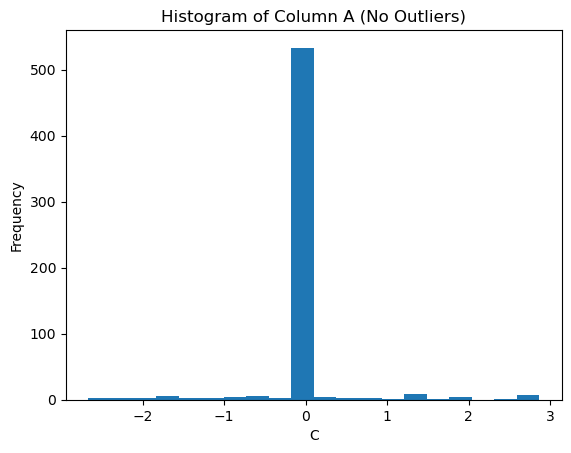

In [85]:
# Histogram for a numeric column
plt.hist(df_combined['C'], bins=20)
plt.xlabel('C')
plt.ylabel('Frequency')
plt.title('Histogram of Column A (No Outliers)')
plt.show()
